# Importing Libraries and Data

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv("heart.csv")

In [8]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
data.shape

(1025, 14)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Training a Decision Tree Classifier and visualize the tree

In [19]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [40]:
y_pred.shape

(205,)

In [130]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [131]:
DT = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=42)

In [132]:
DT.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [133]:
y_pred = DT.predict(x_test)

In [134]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[69 33]
 [12 91]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.68      0.75       102
           1       0.73      0.88      0.80       103

    accuracy                           0.78       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.78      0.78       205

Accuracy Score: 0.7804878048780488


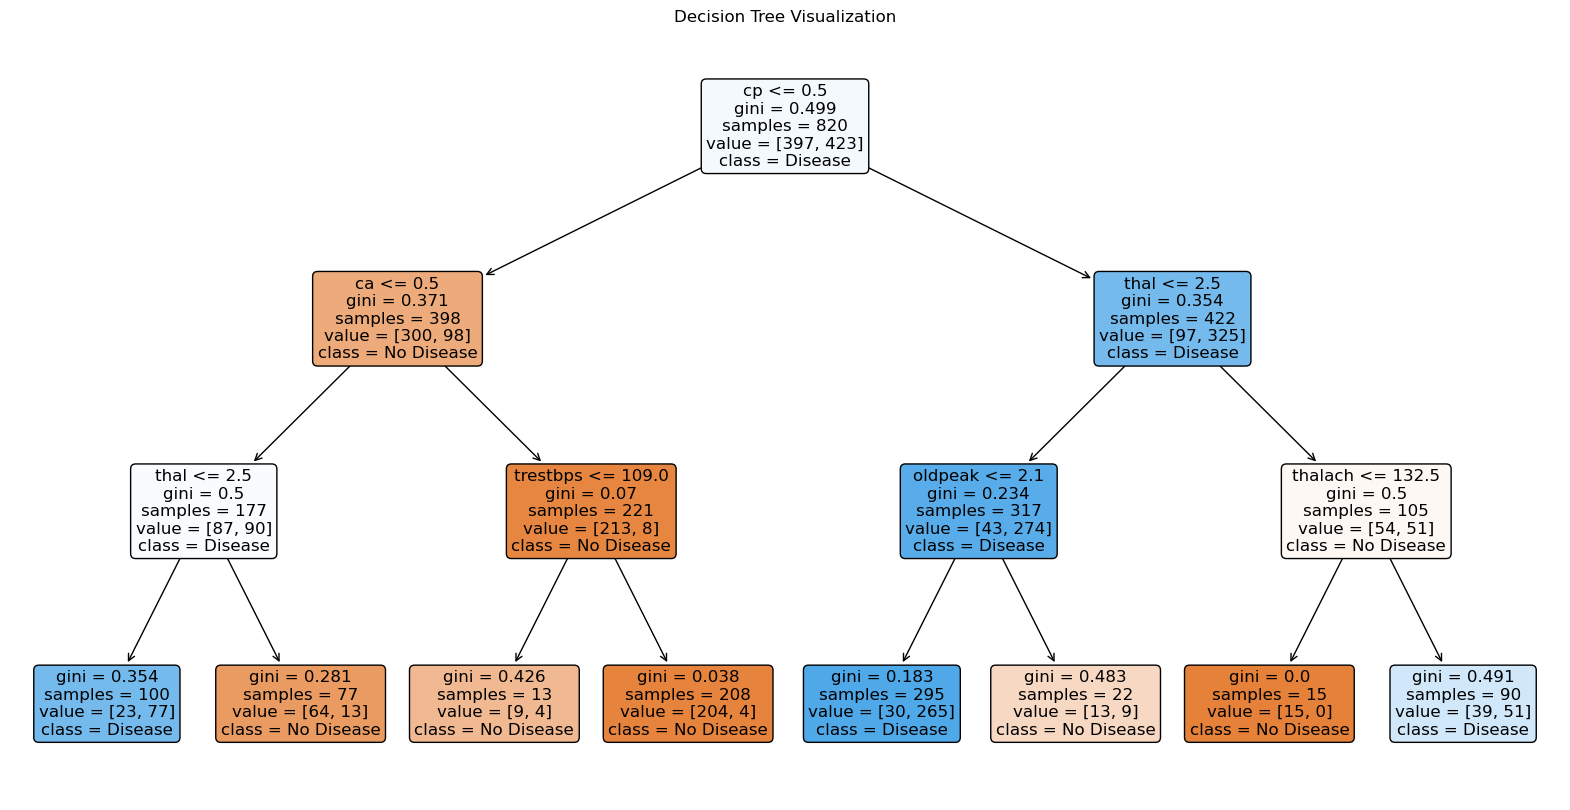

In [135]:
plt.figure(figsize=(20,10))
plot_tree(DT, 
          feature_names=x.columns.tolist(),           
          class_names=["No Disease", "Disease"],      
          filled=True, 
          rounded=True, 
          fontsize=12)
plt.title("Decision Tree Visualization")
plt.show()


In [49]:
x_scaler = StandardScaler()
x_scaled= x_scaler.fit_transform(x)

In [50]:
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(x_scaled,y, random_state=42, test_size=0.2)

In [52]:
DT1 = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=42)

In [53]:
DT1.fit(x_train_scaled,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [54]:
y_pred_scaled = DT1.predict(x_test_scaled)

In [57]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_scaled))
print("\nClassification Report:\n", classification_report(y_test, y_pred_scaled))
print("Accuracy Score:", accuracy_score(y_test, y_pred_scaled))


Confusion Matrix:
 [[69 33]
 [12 91]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.68      0.75       102
           1       0.73      0.88      0.80       103

    accuracy                           0.78       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.78      0.78       205

Accuracy Score: 0.7804878048780488


# Training a Random Forest 

In [143]:
RF = RandomForestClassifier(n_estimators=100,random_state=42,max_depth=9)

In [144]:
RF.fit(x_train,y_train)

RandomForestClassifier(max_depth=9, random_state=42)

In [145]:
rf_y_pred = RF.predict(x_test)

In [146]:
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_y_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_y_pred))
print("Accuracy Score:", accuracy_score(y_test, rf_y_pred))

Confusion Matrix:
 [[102   0]
 [  3 100]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Accuracy Score: 0.9853658536585366


In [118]:
RF1 = RandomForestClassifier(n_estimators=100,random_state=42,max_depth=9)
RF1.fit(x_train_scaled,y_train)
rf_y_pred_scaled = RF1.predict(x_test_scaled)
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_y_pred_scaled))
print("\nClassification Report:\n", classification_report(y_test, rf_y_pred_scaled))
print("Accuracy Score:", accuracy_score(y_test, rf_y_pred_scaled))

Confusion Matrix:
 [[102   0]
 [  3 100]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Accuracy Score: 0.9853658536585366


# Interpreting feature importances

In [136]:
importances = DT.feature_importances_

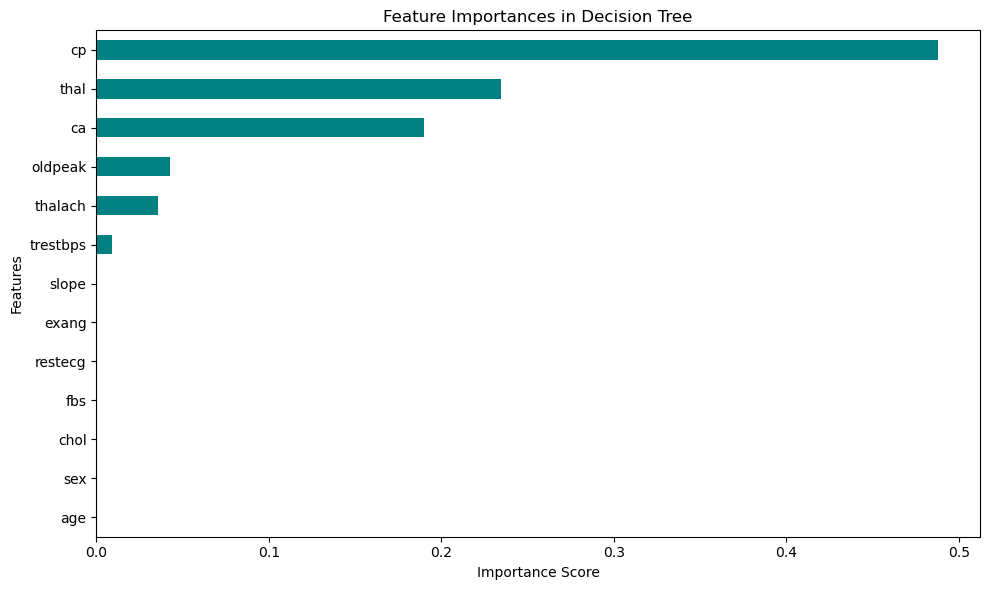

In [138]:
feat_importances = pd.Series(importances, index=x.columns)
feat_importances = feat_importances.sort_values(ascending=True)

plt.figure(figsize=(10,6))
feat_importances.plot(kind='barh', color='teal')
plt.title("Feature Importances in Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Feature Importances in Random Forest')

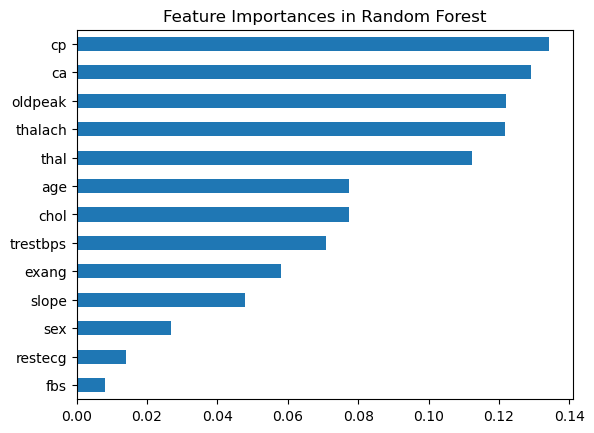

In [147]:
importances_rf = RF.feature_importances_
feat_importances = pd.Series(importances_rf, index=x.columns).sort_values(ascending=True)
feat_importances.plot(kind='barh')
plt.title("Feature Importances in Random Forest")


# Cross Validation on Both the Models

In [120]:
DT = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
dt_scores = cross_val_score(DT, x, y, cv=5)

print("Decision Tree Cross-Validation Accuracy Scores:", dt_scores)
print("Mean Accuracy: %.2f%%" % (dt_scores.mean() * 100))


Decision Tree Cross-Validation Accuracy Scores: [0.85365854 0.84878049 0.82926829 0.82439024 0.79512195]
Mean Accuracy: 83.02%


In [121]:
RF = RandomForestClassifier(n_estimators=100, max_depth=9, random_state=42)
rf_scores = cross_val_score(RF, x, y, cv=5)

print("Random Forest Cross-Validation Accuracy Scores:", rf_scores)
print("Mean Accuracy: %.2f%%" % (rf_scores.mean() * 100))


Random Forest Cross-Validation Accuracy Scores: [1.         1.         0.98536585 1.         0.98536585]
Mean Accuracy: 99.41%
